In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
train_dir=r'/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/train'
validation_dir=r'/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/validation'
test_dir=r'/content/drive/MyDrive/Colab Notebooks/cats_and_dogs/test'

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=40, #rotation from -40 to 40
                                 width_shift_range=0.2, #shifting image by 20% of total width
                                 height_shift_range=0.2, #shifting image by 20% of total height
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 )
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2020 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from keras.applications import VGG16
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3)) # weights=imagenet means we want weights after training in ilvrc competition
# include_top=False means we want only the conv layer if we want the whole model then it would be true
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base.trainable=False # NO need to train 14714688 parameters of conv_base

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=2e-5),metrics=['acc']) #RMSprop is better than sgd for image processing
# smaller learning rate is used beacuse we are fine tuning already trained weights of conv layer incase we train it(here i am not)

In [ ]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")
history=model.fit(train_generator,epochs=30,validation_data=validation_generator,callbacks=[checkpoint_cb])

Epoch 1/30
101/101 [==============================] - 899s 9s/step - loss: 0.5852 - acc: 0.7144 - val_loss: 0.4526 - val_acc: 0.8270
Epoch 2/30
101/101 [==============================] - 755s 7s/step - loss: 0.4814 - acc: 0.7896 - val_loss: 0.3728 - val_acc: 0.8590
Epoch 3/30
101/101 [==============================] - 755s 7s/step - loss: 0.4279 - acc: 0.8144 - val_loss: 0.3301 - val_acc: 0.8580
Epoch 4/30
101/101 [==============================] - 750s 7s/step - loss: 0.4041 - acc: 0.8203 - val_loss: 0.3057 - val_acc: 0.8800
Epoch 5/30
101/101 [==============================] - 727s 7s/step - loss: 0.3757 - acc: 0.8356 - val_loss: 0.2944 - val_acc: 0.8780
Epoch 6/30
101/101 [==============================] - 728s 7s/step - loss: 0.3618 - acc: 0.8446 - val_loss: 0.2824 - val_acc: 0.8850
Epoch 7/30
101/101 [==============================] - 753s 7s/step - loss: 0.3519 - acc: 0.8480 - val_loss: 0.2695 - val_acc: 0.8970
Epoch 8/30
101/101 [==============================] - 754s 7s/step - 

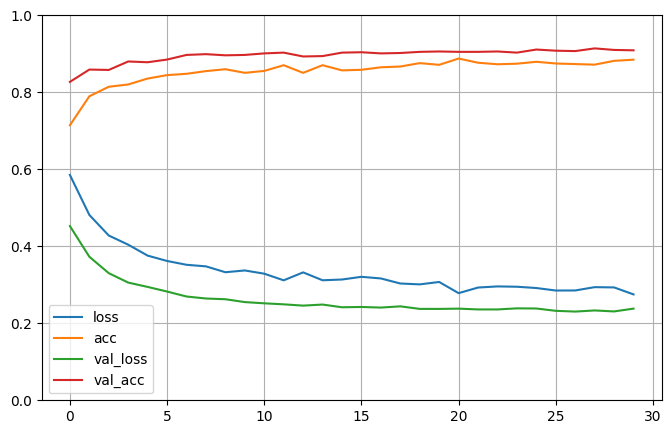

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
hist_df=pd.DataFrame(history.history)

In [ ]:
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
model.save('VGG_NET_NEW.h5')

In [ ]:
model.evaluate(test_generator)

50/50 [==============================] - 336s 7s/step - loss: 0.2540 - acc: 0.8970


[0.253969669342041, 0.8970000147819519]